# Random Forest with Sklearn 

In [1]:
#The Iris dataset is builtin to sklearn 
from sklearn.datasets import load_iris 

In [3]:
iris= load_iris()
#print(iris)
features = iris.data
target = iris.target 

In [10]:
#Split the data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.2, random_state=5)

In [11]:
#Define and fit our model 
from sklearn.ensemble import RandomForestClassifier
rnd_clf= RandomForestClassifier(n_estimators=100, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [12]:
#Make some predictions 
y_pred = rnd_clf.predict(X_test)
#Score 
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9


# Plot Trees from Random Forest 

The first thing we need to do is extract the tree from the RandomForest Model.

In [13]:
extracted_tree = rnd_clf.estimators_[0]#This grabs the first tree within the random forest 

Once we have extract the tree there are two approches we can use to plot it. 

In [14]:
#Using export_graphviz 
from sklearn.tree import export_graphviz
export_graphviz(extracted_tree, out_file='tree.dot',
                feature_names= iris.feature_names,
                class_names=iris.target_names)

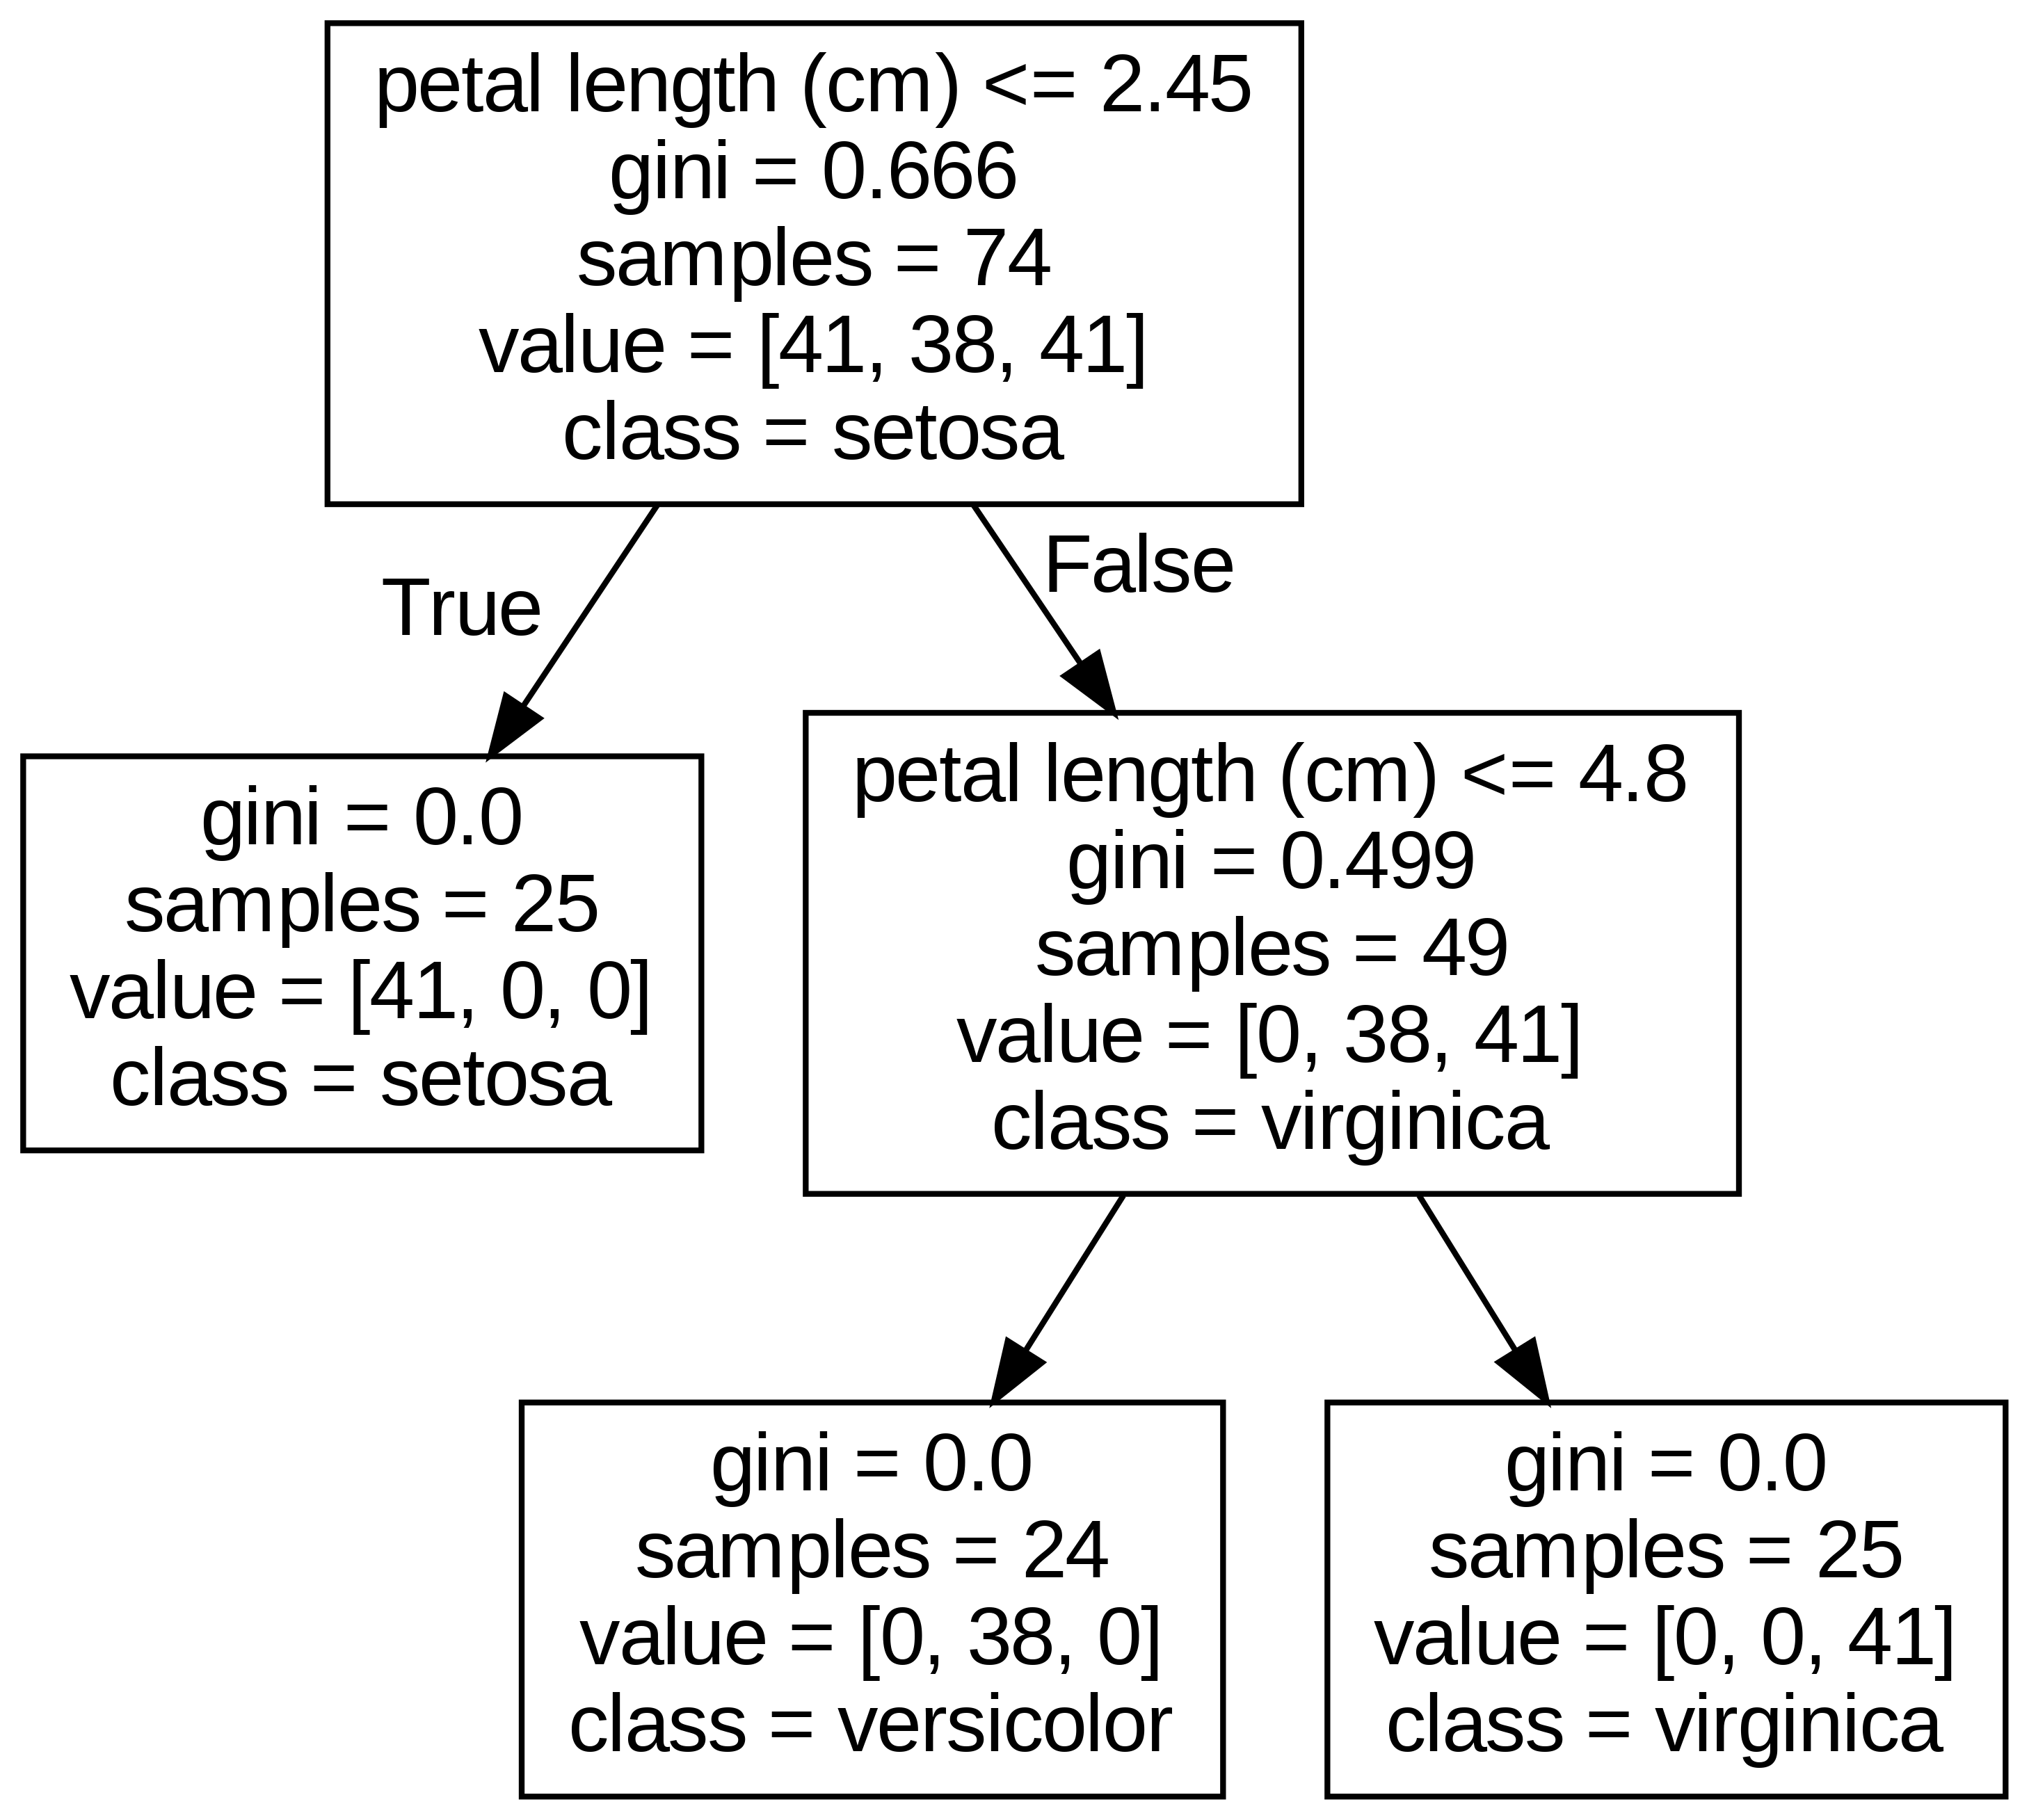

In [17]:
#This a .dot so to view it we need to convert it to an actual image format 
from subprocess import call 
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
from IPython.display import Image 
Image(filename = 'tree.png')

In [19]:
#Using matplotlib 
from sklearn import tree
import matplotlib.pyplot as plt 

In [20]:
plt.figure(figsize=(250,50))
tree.plot_tree(extracted_tree, feature_names=iris.feature_names, class_names= iris.target_names)

[Text(0.4, 0.8333333333333334, 'petal length (cm) <= 2.45\ngini = 0.666\nsamples = 74\nvalue = [41, 38, 41]\nclass = setosa'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 25\nvalue = [41, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'petal length (cm) <= 4.8\ngini = 0.499\nsamples = 49\nvalue = [0, 38, 41]\nclass = virginica'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 24\nvalue = [0, 38, 0]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 25\nvalue = [0, 0, 41]\nclass = virginica')]

# Feature Importance

In [21]:
for name, score in zip(iris['feature_names'], rnd_clf.feature_importances_):
  print(name,score)

sepal length (cm) 0.11192295623964066
sepal width (cm) 0.021320433464023587
petal length (cm) 0.3691174836432695
petal width (cm) 0.4976391266530662


# AdaBoost

In [22]:
from sklearn.tree import DecisionTreeClassifier
#Weak learner without Boosting 
weak_DT = DecisionTreeClassifier(max_depth=1)
#Fit the model 
weak_DT.fit(X_train, y_train)
#Make predictions 
weak_DT_pred = weak_DT.predict(X_test)
#Score 
accuracy_score(y_test, weak_DT_pred)

0.6333333333333333

In [23]:
from sklearn.ensemble import AdaBoostClassifier
#Define our boosted model 
ada_clf = AdaBoostClassifier(weak_DT, n_estimators=200)
#fit our model 
ada_clf.fit(X_train, y_train)
#Make predictions 
ada_pred = ada_clf.predict(X_test)
#Score
accuracy_score(y_test, ada_pred)

0.8666666666666667